In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#%matplotlib inline     
#%matplotlib notebook
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr #, GPDC, CMIknn, CMIsymb

In [2]:
df = pd.read_csv('data/covid-it-trim.csv')
df = df.drop('bedover_mean', axis=1)
df = df.drop('icuover_mean', axis=1)
var_names = list(df.columns)
dataframe = pp.DataFrame(df.to_numpy(), var_names=var_names)
df

,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,newICU_mean,deaths_mean,totdea_mean,mobility_composite,total_tests,confirmed_infections,est_infections_mean
0,68.462421,38.195500,38.026500,23.214764,13.101500,7.0,7.0,-5.648324,3551.100649,230.0,19222.083545
1,100.126424,55.315500,55.037000,33.664003,19.120000,3.0,10.0,-7.898465,3492.996334,93.0,22272.540316
2,136.608358,75.483860,75.055167,41.005434,23.168360,2.0,12.0,-9.971247,3431.977468,78.0,25538.644980
3,179.634071,98.723736,98.081010,50.316713,28.239876,5.0,17.0,-14.780656,3375.601407,251.0,28975.646854
4,237.538149,131.056079,130.125962,67.794578,38.332344,4.0,21.0,-11.975175,3335.640046,239.0,32527.145269
...,...,...,...,...,...,...,...,...,...,...,...
130,191.321050,101.679131,97.633532,28.122914,16.288835,15.0,34833.0,-15.817222,45773.699810,223.0,1547.745453
131,189.431995,100.510335,96.617782,28.726856,16.294166,21.0,34854.0,-15.384390,45324.206408,235.0,1565.438675
132,186.909713,99.377675,95.599505,27.096305,15.302982,7.0,34861.0,-14.879236,44893.314650,192.0,1581.863220
133,185.155051,98.247225,94.566450,26.889471,15.294307,8.0,34869.0,-14.447780,44509.784045,208.0,1595.906747


In [3]:
df.describe()

,allbed_mean,ICUbed_mean,InvVen_mean,admis_mean,newICU_mean,deaths_mean,totdea_mean,mobility_composite,total_tests,confirmed_infections,est_infections_mean
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,3028.121787,1606.223802,1553.148389,460.995812,262.398395,258.511111,22212.222222,-46.604720,42376.102817,1813.155556,19372.018184
std,2916.575165,1546.330797,1499.753712,448.418377,254.682226,258.031291,12995.839630,25.200344,19110.751666,1813.620120,19554.629556
min,68.462421,38.195500,38.026500,23.214764,13.101500,2.000000,7.000000,-79.312668,3330.218314,0.000000,1285.917843
25%,549.509579,288.756880,281.148309,82.241399,47.019698,47.000000,10528.000000,-73.162559,31053.843099,298.000000,2366.578562
50%,1819.294549,976.562402,933.528594,266.845151,153.162754,163.000000,28267.000000,-47.533498,48898.561249,887.000000,10578.381763
75%,5111.244190,2713.559642,2637.283216,774.624299,443.820450,437.500000,33639.000000,-19.656306,57085.678082,3106.000000,33280.697255
max,9071.827188,4807.721901,4673.642055,1404.871867,795.879404,980.000000,34899.000000,-5.648324,62862.997556,6573.000000,60206.988680


In [4]:
parcorr = ParCorr()
pcmci = PCMCI(dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

In [5]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable allbed_mean has 20 parent(s):
    [pc_alpha = 0.5]
        (newICU_mean -2): max_pval = 0.00081, min_val =  0.315
        (newICU_mean -1): max_pval = 0.00126, min_val =  0.300
        (newICU_mean -3): max_pval = 0.02230, min_val =  0.210
        (newICU_mean -4): max_pval = 0.09150, min_val = -0.156
        (est_infections_mean -1): max_pval = 0.13147, min_val =  0.147
        (newICU_mean -5): max_pval = 0.11474, min_val = -0.146
        (est_infections_mean -4): max_pval = 0.19425, min_val = -0.126
        (confirmed_infections -6): max_pval = 0.22654, min_val = -0.121
        (newICU_mean -6): max_pval = 0.20255, min_val = -0.118
        (est_infections_mean -5): max_pval = 0.24786, min_val =  0.113
        (deaths_mean -1


## Significant links at alpha = 0.05:

    Variable allbed_mean has 18 link(s):
        (admis_mean  0): pval = 0.00000 | val =  0.943
        (ICUbed_mean  0): pval = 0.00000 | val =  0.829
        (newICU_mean  0): pval = 0.00000 | val =  0.822
        (InvVen_mean  0): pval = 0.00000 | val =  0.812
        (newICU_mean -1): pval = 0.00000 | val =  0.707
        (newICU_mean -5): pval = 0.00000 | val =  0.481
        (allbed_mean -7): pval = 0.00001 | val = -0.478
        (admis_mean -7): pval = 0.00004 | val = -0.426
        (admis_mean -5): pval = 0.00337 | val =  0.311
        (allbed_mean -8): pval = 0.00669 | val = -0.303
        (newICU_mean -2): pval = 0.00840 | val =  0.275
        (admis_mean -8): pval = 0.01729 | val = -0.256
        (newICU_mean -8): pval = 0.01765 | val = -0.255
        (confirmed_infections -5): pval = 0.02452 | val =  0.237
        (mobility_composite -5): pval = 0.04052 | val = -0.219
        (confirmed_infections -6): pval = 0.03833 | val = -0.219
  

As you can see from the output, PCMCI selected different ``pc_alpha`` for each variable. The result of ``run_pcmci`` is a dictionary containing the matrix of p-values, the matrix of test statistic values (here MCI partial correlations), and optionally its confidence bounds (can be specified upon initializing ``ParCorr``). ``p_matrix`` and ``val_matrix`` are of shape ``(N, N, tau_max+1)`` with entry ``(i, j, \tau)`` denoting the test for the link $X^i_{t-\tau} \to X^j_t$. The MCI values for $\tau=0$ do not exclude other contemporaneous effects, only past variables are conditioned upon.

In [6]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.056 0.101 ... 0.141 0.    0.007]
  [0.    0.814 0.781 ... 0.983 0.733 0.441]
  [0.    0.667 0.806 ... 0.    0.334 0.624]
  ...
  [0.667 0.19  0.126 ... 0.419 0.831 0.313]
  [0.245 0.011 0.153 ... 0.958 0.886 0.211]
  [0.7   0.733 0.964 ... 0.53  0.972 0.444]]

 [[0.    0.66  0.593 ... 0.507 0.253 0.643]
  [1.    0.705 0.707 ... 0.168 0.494 0.786]
  [0.    0.526 0.646 ... 0.    0.25  0.727]
  ...
  [0.877 0.779 0.365 ... 0.429 0.535 0.34 ]
  [0.667 0.663 0.221 ... 0.159 0.05  0.034]
  [0.572 0.998 0.552 ... 0.897 0.837 0.63 ]]

 [[0.    0.111 0.119 ... 0.418 0.844 0.968]
  [0.    0.579 0.711 ... 0.072 0.769 0.748]
  [1.    0.29  0.505 ... 0.    0.454 0.992]
  ...
  [0.763 0.53  0.788 ... 0.245 0.862 0.248]
  [0.923 0.    0.063 ... 0.467 0.12  0.107]
  [0.979 0.755 0.811 ... 0.675 0.614 0.313]]

 ...

 [[0.667 0.976 0.837 ... 0.991 0.873 0.192]
  [0.877 0.939 0.84  ... 0.086 0.072 0.447]
  [0.763 0.689 0.964 ... 0.105 0.222 0.714]
  ...
  [1.    0.    0.    ... 0.    

If we want to control for the $N^2 \tau_\max$ tests conducted here, we can further correct the p-values, e.g., by False Discovery Rate (FDR) control yielding the ``q_matrix``. At a chosen significance level the detected parents of each variable can then be printed:

In [7]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable allbed_mean has 8 link(s):
        (admis_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.943
        (ICUbed_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.829
        (newICU_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.822
        (InvVen_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.812
        (newICU_mean -1): pval = 0.00000 | qval = 0.00000 | val =  0.707
        (newICU_mean -5): pval = 0.00000 | qval = 0.00011 | val =  0.481
        (allbed_mean -7): pval = 0.00001 | qval = 0.00037 | val = -0.478
        (admis_mean -7): pval = 0.00004 | qval = 0.00185 | val = -0.426

    Variable ICUbed_mean has 7 link(s):
        (InvVen_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.997
        (newICU_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.951
        (admis_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.922
        (allbed_mean  0): pval = 0.00000 | qval = 0.00000 | val =  0.829
      

In [8]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

In the process graph, the node color denotes the auto-MCI value and the link colors the cross-MCI value. If links occur at multiple lags between two variables, the link color denotes the strongest one and the label lists all significant lags in order of their strength.

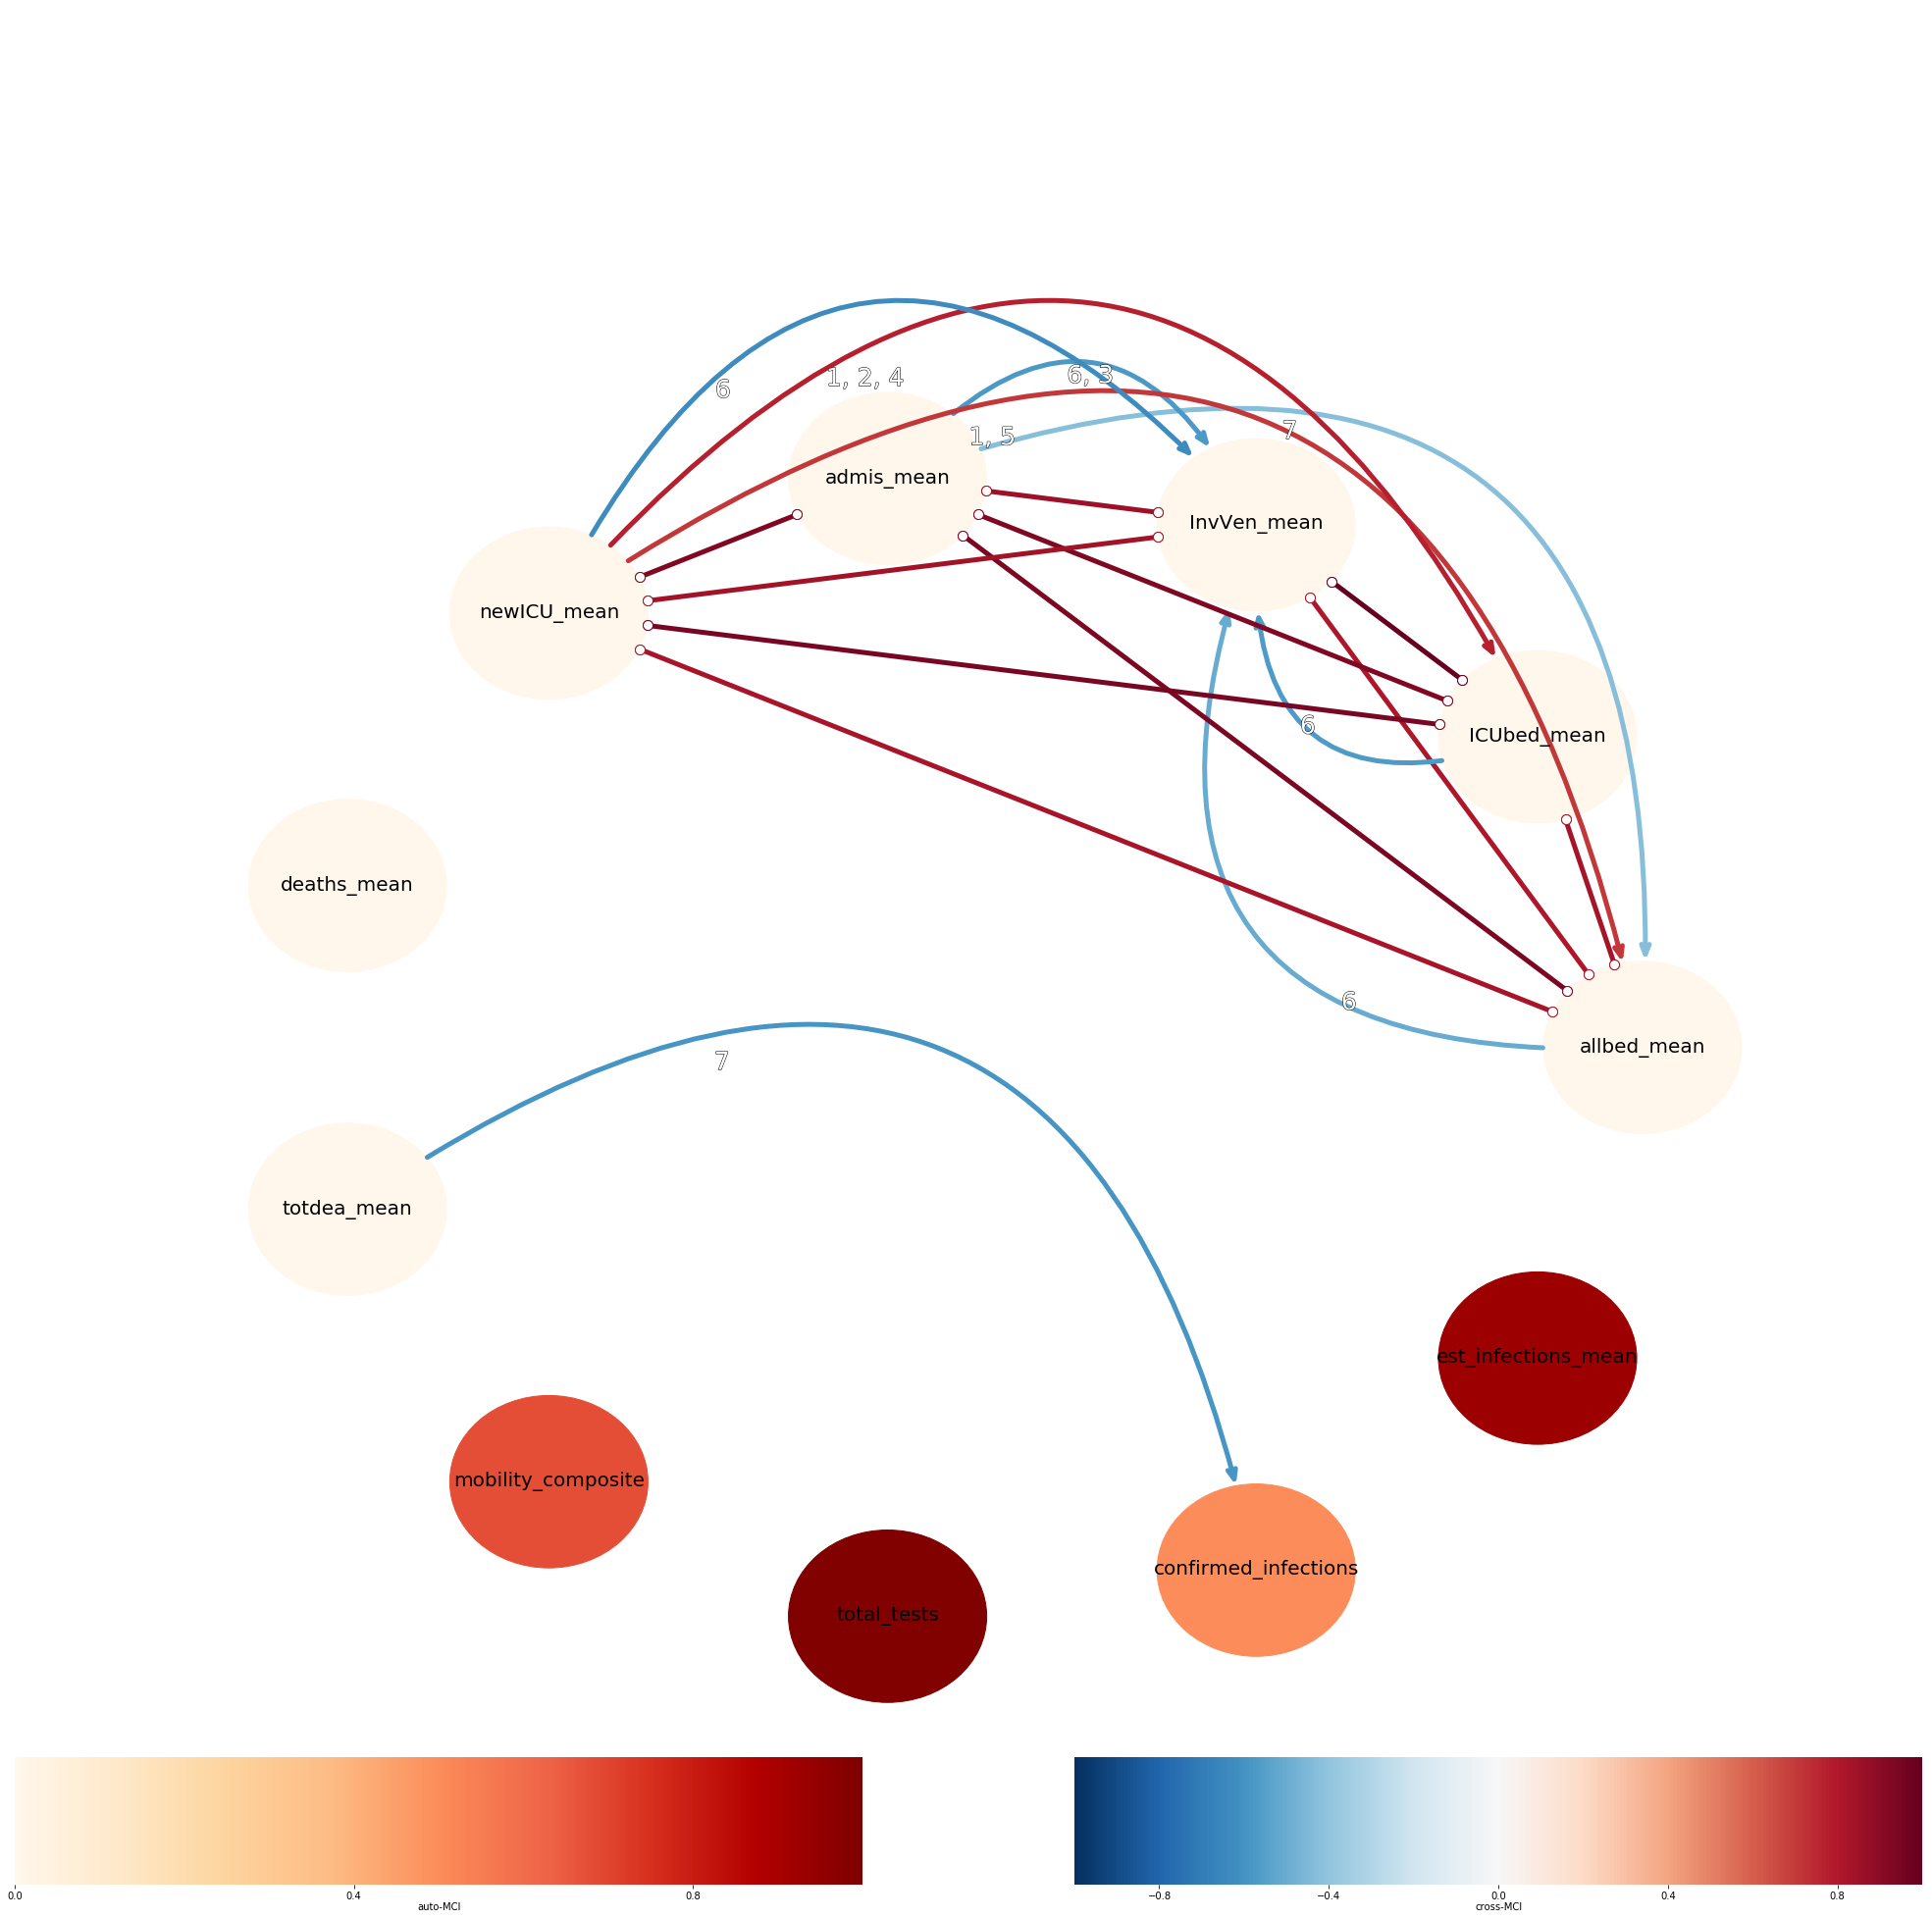

In [9]:
tp.plot_graph(
    figsize=(30,30),
    curved_radius = 0.75,
    link_label_fontsize = 25,
    node_label_size = 20,
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    arrow_linewidth=10
    );

plt.savefig("graph-plot.png")